In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from scipy.signal import argrelextrema


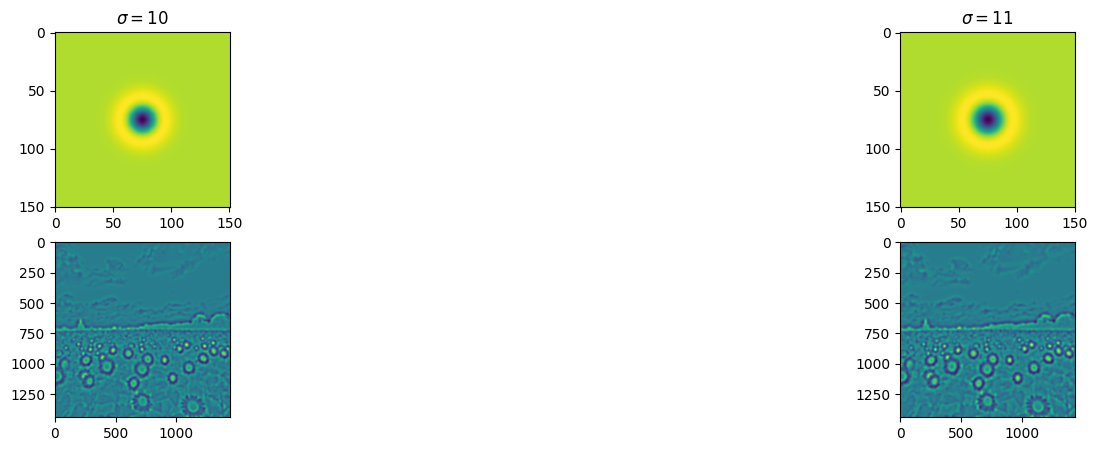

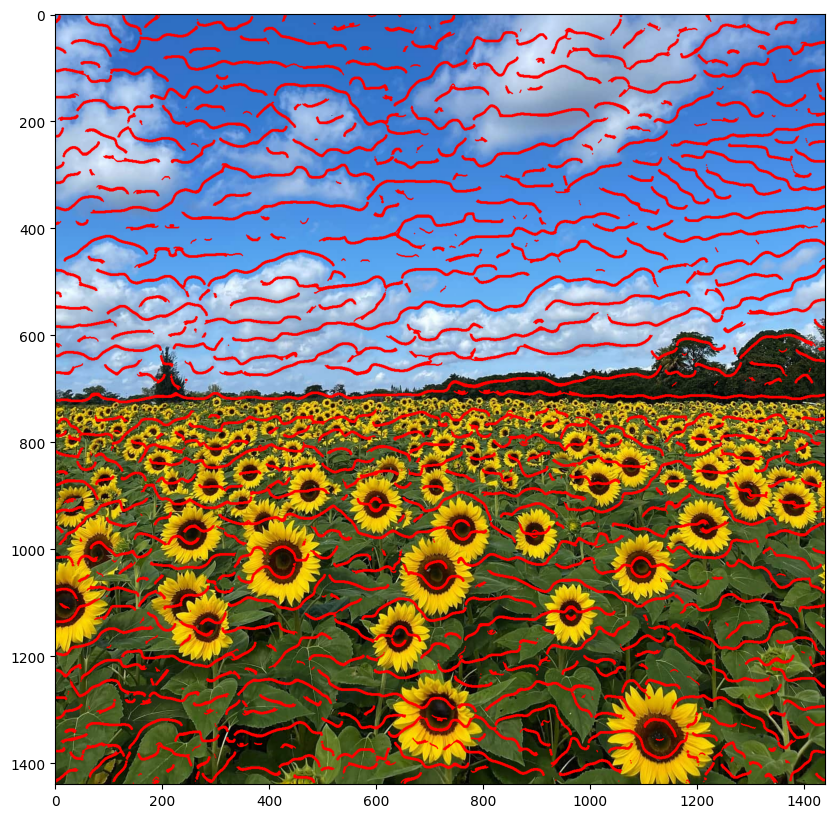

In [62]:
image = cv.imread("the_berry_farms_sunflower_field.jpeg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
image_gray = np.float32(image_gray)
h,w = image_gray.shape

s = 2
scale_space = np.empty((h, w, s),dtype=np.float32)
sigmas = np.arange(10, 10+s, 1)

fig, ax = plt.subplots(2,s,figsize=(20,5))
for i,sigma in enumerate(sigmas) :
    log_hw = 75
    X, Y = np.meshgrid((np.arange(-log_hw,log_hw+1,1)),(np.arange(-log_hw,log_hw+1,1)) )
    log = 1 / (2 * np.pi * sigma**2) * (X**2 / (sigma**2) + Y**2 / (sigma**2) - 2) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    f_log = cv.filter2D(image_gray, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1, i].imshow(f_log)

# Assuming 'scale_space' is your LoG filtered image
local_minima_locations = argrelextrema(scale_space, np.greater)

# 'local_minima_locations' is a tuple of arrays containing the x, y, and scale coordinates of local minima.
# You can iterate over these coordinates to draw circles at each blob location.
for i in range(len(local_minima_locations[0])):
    y = local_minima_locations[0][i]
    x = local_minima_locations[1][i]
    s = local_minima_locations[2][i]
    s = int((2**0.5)* s)

    # Draw a circle at each blob location. You might need to adjust the radius and color depending on your image and blobs.
    cv.circle(image, (x, y), s, (255, 0, 0), 2)

# Display the image with detected blobs
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

